# Machine Learning: Predict Mobile Price Range

## Importing required libraries 

In [1]:
import pandas as pd
import numpy as np

## Load data

In [2]:
df = pd.read_csv('../data/mobile_phones_dataset.csv')

## Checking  dimensions 

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.shape

(2000, 21)

## Check columns  names

In [5]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## A Summary of the data

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Rename Columns

In [7]:
df = df.rename(columns ={'blue':'bluetooth','fc':'fc_megapixel',
                         'pc':'pc_megapixel','m_dep':'m_depth'})

In [8]:
df.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'fc_megapixel',
       'four_g', 'int_memory', 'm_depth', 'mobile_wt', 'n_cores',
       'pc_megapixel', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## Check for duplicates

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(2000, 21)

## Check for nulls

In [11]:
df.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     0
four_g           0
int_memory       0
m_depth          0
mobile_wt        0
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Filling the nulls

In [12]:
df['fc_megapixel'] = df['fc_megapixel'].fillna(0)

In [13]:
df['ram'] = df['ram'].fillna(method='backfill')

In [14]:
df['mobile_wt'] = df['mobile_wt'].fillna(df['mobile_wt'].median())

### Drop the rest of nulls

In [15]:
df = df.dropna()

In [16]:
df.shape

(2000, 21)

## Save data cleaned

In [17]:
df.to_csv('../data\data_cleaned.csv', index ='false')

## Create a new table for numeric data

In [18]:
numric_data = df.drop(['bluetooth', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range'], axis=1)

In [19]:
numric_data.head()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15


In [20]:
numric_data.shape

(2000, 14)

## Create a new table for categorical data

In [21]:
cat_data = df[['bluetooth', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']]

In [22]:
cat_data.head()

,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0,0,0,1,1
1,1,1,1,1,1,0,2
2,1,1,1,1,1,0,2
3,1,0,0,1,0,0,2
4,1,0,1,1,1,0,1


## Check the outliers

In statistics, an outlier is a data point that differs significantly from other observations.

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

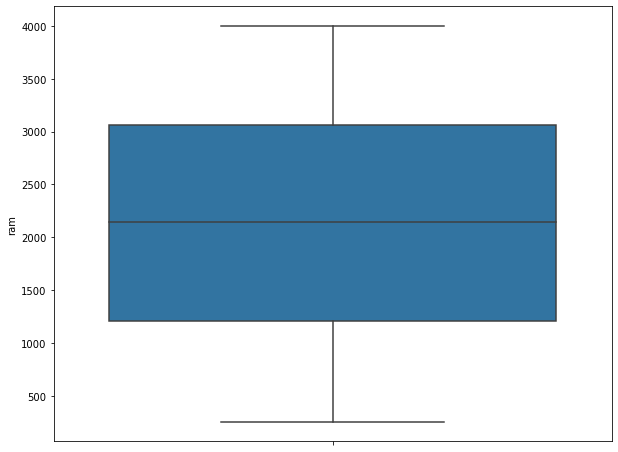

In [24]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.boxplot(y = numric_data['ram'])
plt.show()

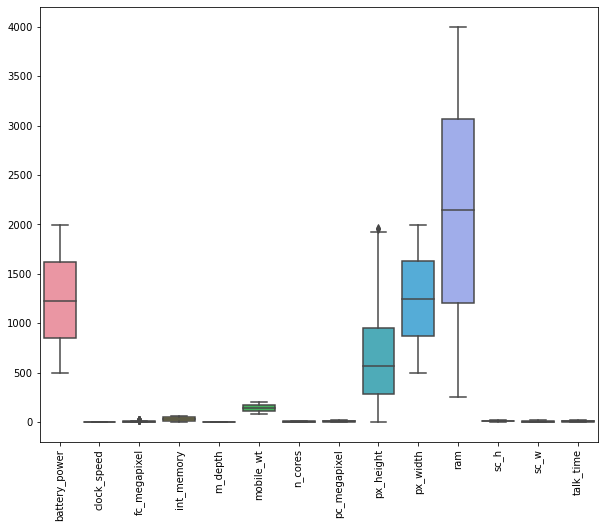

In [25]:
fig, ax = plt.subplots(figsize = (10, 8))
bp = sns.boxplot(data = numric_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)
plt.show()

## Scale the numeric data to have zero mean and unit variance

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(numric_data) 

In [28]:
scaled_data = pd.DataFrame(scaled_array, columns = numric_data.columns)

In [29]:
scaled_data.head()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240


In [30]:
scaled_data.describe()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.128298e-16,-2.172151e-16,9.230117e-17,-8.754109e-17,-1.045830e-16,1.804112e-16,-4.690692e-17,1.669775e-16,1.287304e-16,5.595524e-17,-1.582068e-16,3.719247e-17,-4.085621e-17,1.052491e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-1.253064e+00,-9.928904e-01,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00
25%,-8.804033e-01,-1.007906e+00,-7.624947e-01,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01
50%,-2.849593e-02,-2.727384e-02,-3.017032e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03
75%,8.575560e-01,8.307794e-01,6.198797e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01
max,1.728812e+00,1.811412e+00,3.384628e+00,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00


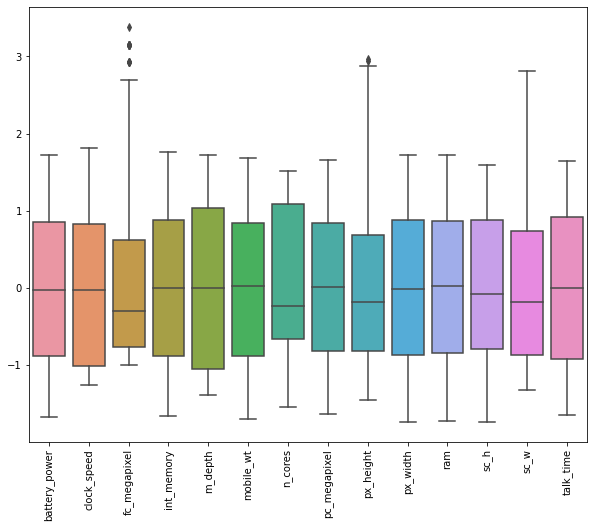

In [31]:
fig, ax = plt.subplots(figsize = (10, 8))
bp = sns.boxplot(data = scaled_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)
plt.show()

## InterQuantile Range

In [32]:
q1 = numric_data.quantile(0.25)
q3 = numric_data.quantile(0.75)
iqr= q3 - q1
print(iqr)

battery_power     763.50
clock_speed         1.50
fc_megapixel        6.00
int_memory         32.00
m_depth             0.60
mobile_wt          61.00
n_cores             4.00
pc_megapixel       10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
dtype: float64


In [33]:
outliers_removed_data = numric_data[~ ((numric_data < (q1 - 1.5*iqr)) \
                                    | (numric_data > (q3 + 1.5*iqr))).any(axis=1)]

In [34]:
outliers_removed_data.shape

(1980, 14)

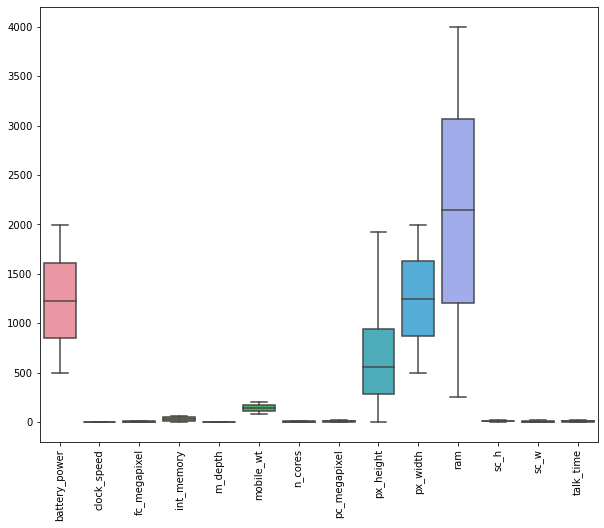

In [35]:
fig, ax = plt.subplots(figsize = (10, 8))
bp = sns.boxplot(data = outliers_removed_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)
plt.show()

____

## Machine Learning

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
scaled_data = scaled_data.reset_index()

In [38]:
cat_data = cat_data.reset_index()

In [39]:
final_df = pd.concat([scaled_data, cat_data],axis=1)

In [40]:
final_df.head()

,index,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,...,sc_w,talk_time,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,...,0.283103,1.462493,0,0,0,0,0,0,1,1
1,1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,...,-0.635317,-0.734267,1,1,1,1,1,1,0,2
2,2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,...,-0.864922,-0.368140,2,1,1,1,1,1,0,2
3,3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,...,0.512708,-0.002014,3,1,0,0,1,0,0,2
4,4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,...,-0.864922,0.730240,4,1,0,1,1,1,0,1


### Define Output and Inputs

In [41]:
X = final_df.drop('price_range', axis=1)
y = final_df['price_range']

### Split dataset

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 101)

In [43]:
X_train.shape, X_test.shape

((1600, 22), (400, 22))

In [44]:
y_train.shape, y_test.shape

((1600,), (400,))

### Instantiate Logistic Regression Model

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logistic_model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=10000)

### Training process

In [47]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

### Score

In [48]:
logistic_model.score(X_test, y_test)

0.935